First calculations of actual ATR20 impact (based mostly on ACCF files data)

In [28]:
# %matplotlib notebook
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
# import ipywidgets as widgets
import math as mt
from ipywidgets import interact, FloatSlider
%matplotlib widget
%matplotlib inline

In [2]:
contrail = xr.open_dataset("sample_data/f100___________20171202_0000_contrail_gp.nc")
contrail

<xarray.Dataset>
Dimensions:    (time: 30, lon: 128, lev: 31, lat: 64, tbnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 2017-12-02 2017-12-03 ... 2017-12-31
  * lon        (lon) float32 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lev        (lev) float32 1.0 2.0 3.0 4.0 5.0 ... 27.0 28.0 29.0 30.0 31.0
  * lat        (lat) float32 87.86 85.1 82.31 79.53 ... -82.31 -85.1 -87.86
Dimensions without coordinates: tbnds
Data variables:
    YYYYMMDD   (time) float64 ...
    dt         (time) float64 ...
    nstep      (time) float64 ...
    hyam       (lev) float32 ...
    hybm       (lev) float32 ...
    b_cc       (time, lev, lat, lon) float32 ...
    potcov     (time, lev, lat, lon) float32 ...
    qsm1       (time, lev, lat, lon) float32 ...
    aps        (time, lat, lon) float32 ...
    time_bnds  (time, tbnds) datetime64[ns] ...
Attributes: (12/48)
    MESSy:                    MESSy version d2.55.2, http://www.messy-interfa...
    MESSy_switch:             version 1.0
    MESSy_channel:            version 2.4.4
    MESSy_tracer:             version 2.6
    MESSy_timer:              version 0.1
    MESSy_qtimer:             version 3.0
    ...                       ...
    operating_user:           (fcastino)
    channel_io_pe:            0
    channel_name:             contrail_gp
    channel_file_type:        output
    channel_file_name:        f100___________20171202_0000_contrail_gp.nc
    channel_netcdf_lib:       4.3.3.1 of Dec 10 2015 16:44:18 $

In [3]:
accf = xr.open_dataset("sample_data/f100___________20171202_0000_accf_gp.nc")
accf

<xarray.Dataset>
Dimensions:         (time: 30, lon: 128, lev: 31, lat: 64, tbnds: 2)
Coordinates:
  * time            (time) datetime64[ns] 2017-12-02 2017-12-03 ... 2017-12-31
  * lon             (lon) float32 0.0 2.812 5.625 8.438 ... 351.6 354.4 357.2
  * lev             (lev) float32 1.0 2.0 3.0 4.0 5.0 ... 28.0 29.0 30.0 31.0
  * lat             (lat) float32 87.86 85.1 82.31 79.53 ... -82.31 -85.1 -87.86
Dimensions without coordinates: tbnds
Data variables:
    YYYYMMDD        (time) float64 ...
    dt              (time) float64 ...
    nstep           (time) float64 ...
    hyam            (lev) float32 ...
    hybm            (lev) float32 ...
    atr20_o3        (time, lev, lat, lon) float32 ...
    atr20_ch4       (time, lev, lat, lon) float32 ...
    atr20_h2o       (time, lev, lat, lon) float32 ...
    atr20_contrail  (time, lev, lat, lon) float32 ...
    atr20_co2       (time, lev, lat, lon) float32 ...
    aps             (time, lat, lon) float32 ...
    time_bnds       (time, tbnds) datetime64[ns] ...
Attributes: (12/48)
    MESSy:                    MESSy version d2.55.2, http://www.messy-interfa...
    MESSy_switch:             version 1.0
    MESSy_channel:            version 2.4.4
    MESSy_tracer:             version 2.6
    MESSy_timer:              version 0.1
    MESSy_qtimer:             version 3.0
    ...                       ...
    operating_user:           (fcastino)
    channel_io_pe:            0
    channel_name:             accf_gp
    channel_file_type:        output
    channel_file_name:        f100___________20171202_0000_accf_gp.nc
    channel_netcdf_lib:       4.3.3.1 of Dec 10 2015 16:44:18 $

In [4]:
contr_atr20_perkm = contrail['potcov']*accf['atr20_contrail']

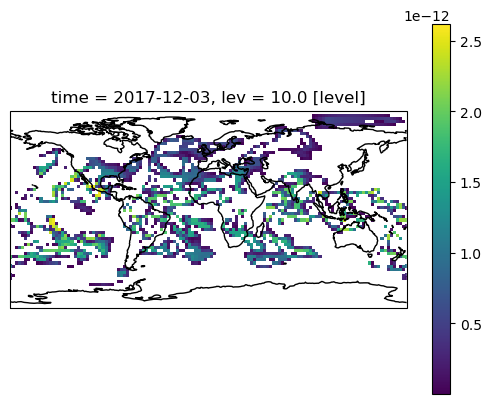

In [5]:
var = contr_atr20_perkm.isel(time=1).sel(lev=10.0)
var = var.where(var > 1e-20)
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.stock_img()
ax.coastlines()

# extent = [-25, 60, 20, 70]
# ax.set_extent(extent)

p = var.plot(transform=ccrs.PlateCarree())#,vmin=6.9e-15, vmax=7.2e-15)

In [6]:
echam = xr.open_dataset('sample_data/f100___________20171202_0000_ECHAM5.nc')
echam

<xarray.Dataset>
Dimensions:      (time: 30, lon: 128, lat: 64, lev: 31, ilev: 32, tbnds: 2)
Coordinates:
  * time         (time) datetime64[ns] 2017-12-02 2017-12-03 ... 2017-12-31
  * lon          (lon) float32 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat          (lat) float32 87.86 85.1 82.31 79.53 ... -82.31 -85.1 -87.86
  * lev          (lev) float32 1.0 2.0 3.0 4.0 5.0 ... 27.0 28.0 29.0 30.0 31.0
  * ilev         (ilev) float32 1.0 2.0 3.0 4.0 5.0 ... 28.0 29.0 30.0 31.0 32.0
Dimensions without coordinates: tbnds
Data variables: (12/85)
    YYYYMMDD     (time) float64 ...
    dt           (time) float64 ...
    nstep        (time) float64 ...
    hyam         (lev) float32 ...
    hybm         (lev) float32 ...
    hyai         (ilev) float32 ...
    ...           ...
    sigmadot     (time, ilev, lat, lon) float32 ...
    tke          (time, lev, lat, lon) float32 ...
    ocu          (time, lat, lon) float32 ...
    ocv          (time, lat, lon) float32 ...
    aps          (time, lat, lon) float32 ...
    time_bnds    (time, tbnds) datetime64[ns] ...
Attributes: (12/48)
    MESSy:                    MESSy version d2.55.2, http://www.messy-interfa...
    MESSy_switch:             version 1.0
    MESSy_channel:            version 2.4.4
    MESSy_tracer:             version 2.6
    MESSy_timer:              version 0.1
    MESSy_qtimer:             version 3.0
    ...                       ...
    operating_user:           (fcastino)
    channel_io_pe:            0
    channel_name:             ECHAM5
    channel_file_type:        output
    channel_file_name:        f100___________20171202_0000_ECHAM5.nc
    channel_netcdf_lib:       4.3.3.1 of Dec 10 2015 16:44:18 $

In [7]:
gamma = 1.4
R_air = 287.05
M = 0.8

speed = M * np.sqrt(gamma * R_air * echam['tm1'])
# speed.rename('speed')
speed

<xarray.DataArray 'tm1' (time: 30, lev: 31, lat: 64, lon: 128)>
array([[[[225.71765, 225.71147, 225.70723, ..., 225.74767, 225.73575,
          225.72574],
         [224.73013, 224.72282, 224.72   , ..., 224.77946, 224.75842,
          224.74197],
         [223.7564 , 223.7585 , 223.7686 , ..., 223.8002 , 223.77708,
          223.76253],
         ...,
         [252.50993, 252.49161, 252.47295, ..., 252.56804, 252.5476 ,
          252.52843],
         [252.68562, 252.66765, 252.65042, ..., 252.74544, 252.72437,
          252.7045 ],
         [252.87157, 252.86028, 252.84944, ..., 252.90794, 252.89542,
          252.88326]],

        [[226.13382, 226.11682, 226.10188, ..., 226.19673, 226.17386,
          226.15286],
         [225.08694, 225.04558, 225.0094 , ..., 225.24133, 225.18492,
          225.13342],
         [224.03343, 223.97412, 223.9239 , ..., 224.26677, 224.17976,
          224.10197],
...
         [256.67685, 256.49628, 256.33136, ..., 257.36664, 257.1079 ,
          256.87912],
         [255.67334, 255.54512, 255.42139, ..., 256.0963 , 255.94815,
          255.80736],
         [253.62633, 253.58801, 253.55005, ..., 253.74185, 253.7034 ,
          253.66483]],

        [[255.2616 , 255.30049, 255.34236, ..., 255.16626, 255.19414,
          255.22603],
         [253.57585, 253.75203, 253.92627, ..., 253.04312, 253.22026,
          253.39832],
         [255.184  , 255.40396, 255.57225, ..., 254.16646, 254.56668,
          254.906  ],
         ...,
         [256.06268, 255.87825, 255.69441, ..., 256.69135, 256.46295,
          256.25528],
         [254.96349, 254.8137 , 254.66573, ..., 255.4322 , 255.27202,
          255.11597],
         [253.03535, 252.99596, 252.95828, ..., 253.16235, 253.11877,
          253.0764 ]]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2017-12-02 2017-12-03 ... 2017-12-31
  * lon      (lon) float32 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float32 87.86 85.1 82.31 79.53 ... -79.53 -82.31 -85.1 -87.86
  * lev      (lev) float32 1.0 2.0 3.0 4.0 5.0 6.0 ... 27.0 28.0 29.0 30.0 31.0

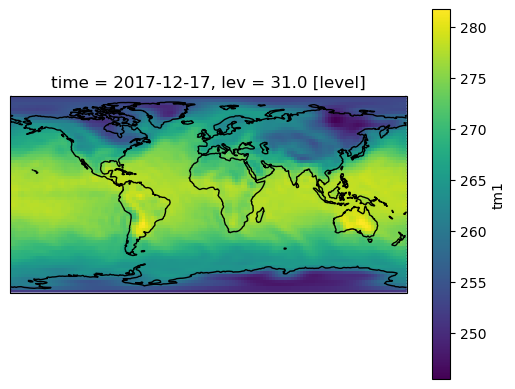

In [16]:
var = speed.isel(time=15).sel(lev=31.0)
var = var.where(var > 1e-20)
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.stock_img()
ax.coastlines()

# extent = [-25, 60, 20, 70]
# ax.set_extent(extent)

p = var.plot(transform=ccrs.PlateCarree())#,vmin=6.9e-15, vmax=7.2e-15)

In [9]:
fuel_persec = 41.7 #kg/s
co2_atr20_perkm = accf['atr20_co2'] * fuel_persec / speed
co2_atr20_perkm

<xarray.DataArray (time: 30, lev: 31, lat: 64, lon: 128)>
array([[[[1.2949452e-15, 1.2949806e-15, 1.2950050e-15, ...,
          1.2947730e-15, 1.2948414e-15, 1.2948988e-15],
         [1.3006355e-15, 1.3006777e-15, 1.3006942e-15, ...,
          1.3003501e-15, 1.3004718e-15, 1.3005670e-15],
         [1.3062956e-15, 1.3062833e-15, 1.3062243e-15, ...,
          1.3060399e-15, 1.3061748e-15, 1.3062598e-15],
         ...,
         [1.1575465e-15, 1.1576305e-15, 1.1577161e-15, ...,
          1.1572802e-15, 1.1573739e-15, 1.1574617e-15],
         [1.1567417e-15, 1.1568239e-15, 1.1569028e-15, ...,
          1.1564680e-15, 1.1565643e-15, 1.1566553e-15],
         [1.1558911e-15, 1.1559427e-15, 1.1559922e-15, ...,
          1.1557248e-15, 1.1557821e-15, 1.1558377e-15]],

        [[1.2925620e-15, 1.2926592e-15, 1.2927446e-15, ...,
          1.2922025e-15, 1.2923332e-15, 1.2924532e-15],
         [1.2985737e-15, 1.2988124e-15, 1.2990213e-15, ...,
          1.2976836e-15, 1.2980087e-15, 1.2983056e-15],
         [1.3046802e-15, 1.3050257e-15, 1.3053184e-15, ...,
          1.3033228e-15, 1.3038286e-15, 1.3042811e-15],
...
         [1.1387548e-15, 1.1395564e-15, 1.1402896e-15, ...,
          1.1357027e-15, 1.1368456e-15, 1.1378581e-15],
         [1.1432244e-15, 1.1437979e-15, 1.1443521e-15, ...,
          1.1413361e-15, 1.1419969e-15, 1.1426254e-15],
         [1.1524513e-15, 1.1526254e-15, 1.1527980e-15, ...,
          1.1519266e-15, 1.1521012e-15, 1.1522764e-15]],

        [[1.1450684e-15, 1.1448940e-15, 1.1447063e-15, ...,
          1.1454962e-15, 1.1453711e-15, 1.1452279e-15],
         [1.1526807e-15, 1.1518804e-15, 1.1510900e-15, ...,
          1.1551074e-15, 1.1542993e-15, 1.1534883e-15],
         [1.1454166e-15, 1.1444301e-15, 1.1436766e-15, ...,
          1.1500022e-15, 1.1481942e-15, 1.1466658e-15],
         ...,
         [1.1414861e-15, 1.1423088e-15, 1.1431301e-15, ...,
          1.1386904e-15, 1.1397045e-15, 1.1406281e-15],
         [1.1464072e-15, 1.1470811e-15, 1.1477476e-15, ...,
          1.1443036e-15, 1.1450217e-15, 1.1457221e-15],
         [1.1551429e-15, 1.1553228e-15, 1.1554948e-15, ...,
          1.1545634e-15, 1.1547621e-15, 1.1549556e-15]]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2017-12-02 2017-12-03 ... 2017-12-31
  * lon      (lon) float32 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lev      (lev) float32 1.0 2.0 3.0 4.0 5.0 6.0 ... 27.0 28.0 29.0 30.0 31.0
  * lat      (lat) float32 87.86 85.1 82.31 79.53 ... -79.53 -82.31 -85.1 -87.86

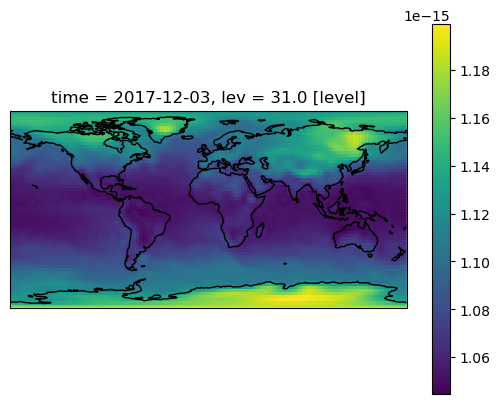

In [10]:
var = co2_atr20_perkm.isel(time=1).sel(lev=31.0)
var = var.where(var > 1e-20)
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.stock_img()
ax.coastlines()

# extent = [-25, 60, 20, 70]
# ax.set_extent(extent)

p = var.plot(transform=ccrs.PlateCarree())#,vmin=6.9e-15, vmax=7.2e-15)

In [11]:
fuel_persec = 41.7 #kg/s
h2o_atr20_perkm = accf['atr20_h2o'] * fuel_persec / speed * 1000
h2o_atr20_perkm

<xarray.DataArray (time: 30, lev: 31, lat: 64, lon: 128)>
array([[[[3.74106779e-13, 3.74116997e-13, 3.74124044e-13, ...,
          3.74057041e-13, 3.74076773e-13, 3.74093362e-13],
         [3.75750700e-13, 3.75762924e-13, 3.75767641e-13, ...,
          3.75668219e-13, 3.75703402e-13, 3.75730886e-13],
         [3.77385867e-13, 3.77382316e-13, 3.77365294e-13, ...,
          3.77312005e-13, 3.77350982e-13, 3.77375540e-13],
         ...,
         [3.34412592e-13, 3.34436878e-13, 3.34461598e-13, ...,
          3.34335668e-13, 3.34362719e-13, 3.34388116e-13],
         [3.34180085e-13, 3.34203856e-13, 3.34226651e-13, ...,
          3.34100992e-13, 3.34128856e-13, 3.34155121e-13],
         [3.33934350e-13, 3.33949285e-13, 3.33963570e-13, ...,
          3.33886320e-13, 3.33902854e-13, 3.33918928e-13]],

        [[1.36400335e-11, 1.36524221e-11, 1.36640543e-11, ...,
          1.35987393e-11, 1.36131453e-11, 1.36269242e-11],
         [1.39309684e-11, 1.39630642e-11, 1.39943708e-11, ...,
          1.38314299e-11, 1.38650202e-11, 1.38982402e-11],
         [1.39732436e-11, 1.40302362e-11, 1.40885983e-11, ...,
          1.38146664e-11, 1.38651235e-11, 1.39180776e-11],
...
          3.28101966e-13, 3.28432160e-13, 3.28724678e-13],
         [3.30274951e-13, 3.30440672e-13, 3.30600754e-13, ...,
          3.29729462e-13, 3.29920336e-13, 3.30101913e-13],
         [3.32940625e-13, 3.32990905e-13, 3.33040778e-13, ...,
          3.32789026e-13, 3.32839442e-13, 3.32890101e-13]],

        [[3.30807701e-13, 3.30757313e-13, 3.30703076e-13, ...,
          3.30931300e-13, 3.30895142e-13, 3.30853807e-13],
         [3.33006870e-13, 3.32775691e-13, 3.32547331e-13, ...,
          3.33707942e-13, 3.33474513e-13, 3.33240217e-13],
         [3.30908288e-13, 3.30623333e-13, 3.30405598e-13, ...,
          3.32233075e-13, 3.31710760e-13, 3.31269192e-13],
         ...,
         [3.29772776e-13, 3.30010460e-13, 3.30247738e-13, ...,
          3.28965127e-13, 3.29258078e-13, 3.29524927e-13],
         [3.31194490e-13, 3.31389186e-13, 3.31581740e-13, ...,
          3.30586741e-13, 3.30794203e-13, 3.30996542e-13],
         [3.33718188e-13, 3.33770175e-13, 3.33819859e-13, ...,
          3.33550814e-13, 3.33608222e-13, 3.33664059e-13]]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2017-12-02 2017-12-03 ... 2017-12-31
  * lon      (lon) float32 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lev      (lev) float32 1.0 2.0 3.0 4.0 5.0 6.0 ... 27.0 28.0 29.0 30.0 31.0
  * lat      (lat) float32 87.86 85.1 82.31 79.53 ... -79.53 -82.31 -85.1 -87.86

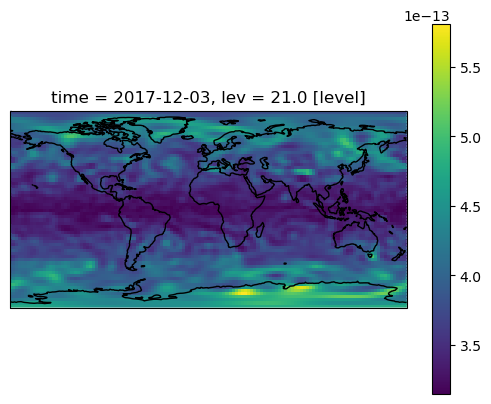

In [12]:
var = h2o_atr20_perkm.isel(time=1).sel(lev=21.0)
var = var.where(var > 1e-20)
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.stock_img()
ax.coastlines()

# extent = [-25, 60, 20, 70]
# ax.set_extent(extent)

p = var.plot(transform=ccrs.PlateCarree())#,vmin=6.9e-15, vmax=7.2e-15)

In [29]:
def plot_inter(lev):
    var = h2o_atr20_perkm.isel(time=1).sel(lev=lev, method='nearest')
    var = var.where(var > 1e-20)
    ax = plt.axes(projection=ccrs.PlateCarree())
    # ax.stock_img()
    ax.coastlines()

    # extent = [-25, 60, 20, 70]
    # ax.set_extent(extent)

    p = var.plot(transform=ccrs.PlateCarree())#,vmin=6.9e-15, vmax=7.2e-15)

interact(plot_inter, lev=FloatSlider(min=0, max=31, step=1, value=0.0))

# plot_inter(0.0)

interactive(children=(FloatSlider(value=0.0, description='lev', max=31.0, step=1.0), Output()), _dom_classes=(…

<function __main__.plot_inter(lev)>